In [1]:
import pandas as pd 
import datetime
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv('./datasets/movies_dataset.csv')
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
movies['original_language'].value_counts().head(50)

en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
ru      826
hi      508
ko      444
zh      409
sv      384
pt      316
cn      313
fi      297
nl      248
da      225
pl      219
tr      150
cs      130
el      113
no      106
fa      101
hu      100
ta       78
th       76
he       67
sr       63
ro       57
te       45
ar       39
ml       36
xx       33
bn       29
hr       29
mr       25
is       24
et       24
tl       23
id       20
lv       18
ka       18
sl       17
uk       16
bs       14
ca       12
ab       10
vi       10
bg       10
sk        9
lt        9
Name: original_language, dtype: int64

In [4]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
movies['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [8]:
movies = movies.drop('adult', axis=1)

In [9]:
df = pd.read_csv('./datasets/movies_dataset.csv')
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [10]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

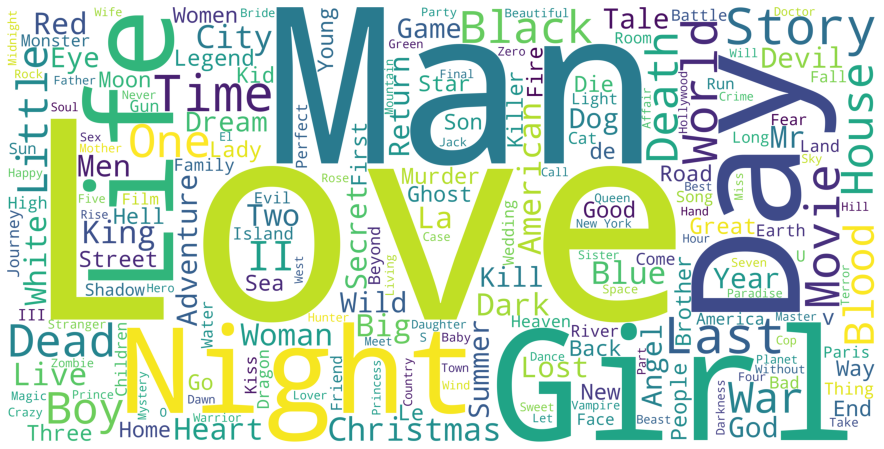

In [11]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

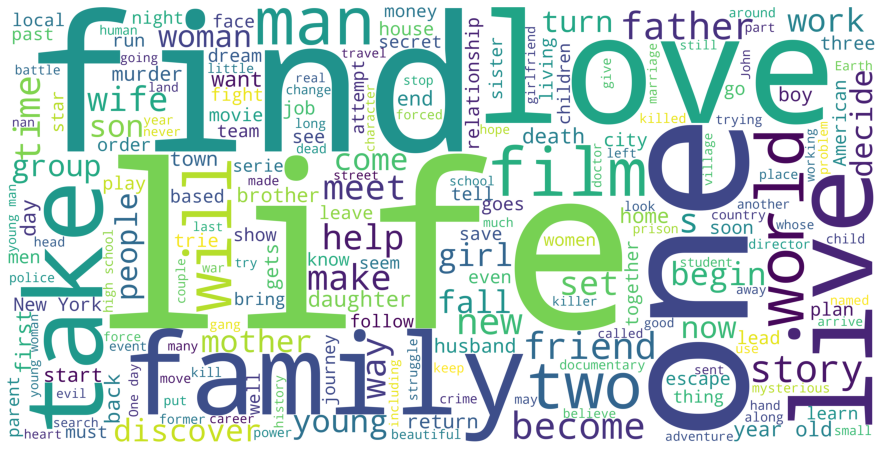

In [12]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [13]:
## Trabajamos con la ganancia, inversion y retorno

movies['revenue'] = movies['revenue'].replace(0, np.nan)
movies['budget'] = pd.to_numeric(movies['budget'], errors = 'coerce')
movies['budget'] = movies['budget'].replace(0, np.nan)

movies['return'] = movies['revenue'] / movies['budget']
print(movies[movies['return'].isnull()].shape)
print(movies[movies['budget'].isnull()].shape)

(40085, 24)
(36576, 24)


Idioma Peliculas

In [14]:
movies['spoken_languages']

0                 [{'iso_639_1': 'en', 'name': 'English'}]
1        [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                 [{'iso_639_1': 'en', 'name': 'English'}]
3                 [{'iso_639_1': 'en', 'name': 'English'}]
4                 [{'iso_639_1': 'en', 'name': 'English'}]
                               ...                        
45461               [{'iso_639_1': 'fa', 'name': 'فارسی'}]
45462                    [{'iso_639_1': 'tl', 'name': ''}]
45463             [{'iso_639_1': 'en', 'name': 'English'}]
45464                                                   []
45465             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 45466, dtype: object

In [15]:
movies['spoken_languages'] = movies['spoken_languages'].fillna('[]').apply(ast.literal_eval)
movies['spoken_languages'] = movies['spoken_languages'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])  

In [16]:
i = movies.apply(lambda x: pd.Series(x['spoken_languages']),axis=1).stack().reset_index(level=1, drop=True)
i.name = 'languages'

In [17]:
i

0         English
1         English
1        Français
2         English
3         English
           ...   
45460     English
45461       فارسی
45462            
45463     English
45465     English
Name: languages, Length: 53300, dtype: object

In [18]:
lang_df = movies.drop('spoken_languages', axis=1).join(i)
lang_df = pd.DataFrame(lang_df['languages'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['num_movies', 'language']
lang_df = lang_df.reset_index().drop('index', axis=1)
lang_df.head(10)

,num_movies,language
0,28745,English
1,4196,Français
2,2625,Deutsch
3,2413,Español
4,2367,Italiano
5,1758,日本語
6,1563,Pусский
7,790,普通话
8,707,हिन्दी
9,591,Português


In [19]:
lang_df.to_csv('langpeli.csv', index=False)

Duracion Peliculas

In [20]:
movies['year'] = pd.to_datetime(movies['release_date'], errors= 'coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [21]:
dur = movies[['title', 'runtime', 'year']]

In [22]:
dur.head()

,title,runtime,year
0,Toy Story,81.0,1995
1,Jumanji,104.0,1995
2,Grumpier Old Men,101.0,1995
3,Waiting to Exhale,127.0,1995
4,Father of the Bride Part II,106.0,1995


In [23]:
dur.reset_index(inplace=True)

In [24]:
dur.drop(['index'], axis = 1,inplace = True)

In [25]:
dur.to_csv('pelidur.csv', index = False)

In [26]:
df = pd.read_csv('pelidur.csv')
df.head(10)

,title,runtime,year
0,Toy Story,81.0,1995
1,Jumanji,104.0,1995
2,Grumpier Old Men,101.0,1995
3,Waiting to Exhale,127.0,1995
4,Father of the Bride Part II,106.0,1995
5,Heat,170.0,1995
6,Sabrina,127.0,1995
7,Tom and Huck,97.0,1995
8,Sudden Death,106.0,1995
9,GoldenEye,130.0,1995


Franquicia. Ganancia y promedio

In [27]:
df_fran = movies[movies['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


In [28]:
fran = fran_pivot.sort_values('sum', ascending=False).reset_index()

In [29]:
fran.head()

,index,belongs_to_collection,count,mean,sum
0,552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1,1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
2,646,James Bond Collection,26,2.733450e+08,7.106970e+09
3,1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
4,968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


In [30]:
fran.to_csv('franq.csv', index = False)

Pelicula por pais

In [31]:
movies['production_countries']

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object

In [32]:
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(ast.literal_eval)
movies['production_countries'] = movies['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])  

In [33]:
movies['production_countries']

0        [United States of America]
1        [United States of America]
2        [United States of America]
3        [United States of America]
4        [United States of America]
                    ...            
45461                        [Iran]
45462                 [Philippines]
45463    [United States of America]
45464                      [Russia]
45465              [United Kingdom]
Name: production_countries, Length: 45466, dtype: object

In [34]:
s = movies.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'
s

0        United States of America
1        United States of America
2        United States of America
3        United States of America
4        United States of America
                   ...           
45461                        Iran
45462                 Philippines
45463    United States of America
45464                      Russia
45465              United Kingdom
Name: countries, Length: 49423, dtype: object

In [35]:
con_df = movies.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [36]:
con_df.to_csv('paispeli.csv', index=False)

Productoras exitosas

In [37]:
movies['production_companies'] = movies['production_companies'].fillna('[]').apply(ast.literal_eval)
movies['production_companies'] = movies['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [38]:
d = movies.apply(lambda x: pd.Series(x['production_companies']), axis=1).stack().reset_index(level=1, drop=True)
d.name = 'companies'

In [39]:
com_df = movies.drop('production_companies', axis=1).join(d)

In [40]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']

com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']

com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

In [41]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78


In [42]:
prod = com_pivot.sort_values('Total', ascending=False)

In [43]:
prod.reset_index(inplace=True)

In [44]:
prod.head()

,companies,Total,Average,Number
0,Warner Bros.,6.352519e+10,1.293792e+08,491
1,Universal Pictures,5.525919e+10,1.193503e+08,463
2,Paramount Pictures,4.880819e+10,1.235650e+08,395
3,Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
4,Walt Disney Pictures,4.083727e+10,2.778046e+08,147


In [45]:
prod.to_csv('prod.csv', index = False)

Analizamos el dataset de creditos

In [46]:
credits_df = pd.read_csv('./datasets/credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [47]:
## Transformamos la columna ID en el dataset movies
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [48]:
movies['id'] = movies['id'].apply(convert_int)

In [49]:
movies[movies['id'].isnull()]

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year
19730,0.065736,NaN,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,...,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
29503,1.931659,NaN,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,...,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
35587,2.185485,NaN,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,...,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [50]:
movies = movies.drop([19730, 29503, 35587])

In [51]:
movies['id'] = movies['id'].astype('int')

In [52]:
mov_cred = movies.merge(credits_df, on='id')
mov_cred.shape

(45538, 27)

In [53]:
mov_cred['cast'] = mov_cred['cast'].apply(ast.literal_eval)
mov_cred['crew'] = mov_cred['crew'].apply(ast.literal_eval)

In [54]:
mov_cred['cast'] = mov_cred['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [55]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [56]:
mov_cred['director'] = mov_cred['crew'].apply(get_director)

In [57]:
s = mov_cred.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = mov_cred.drop('cast', axis=1).join(s)

In [58]:
actor_list = cast_df.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)
director_list = mov_cred.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

Exito de Director

In [59]:
success_df = mov_cred[(mov_cred['return'].notnull()) & (mov_cred['revenue'] > 1e7) & (mov_cred['director'].isin(director_list))]
dir = pd.DataFrame(success_df.groupby('director')['return'].mean().sort_values(ascending=False))

In [60]:
dir.reset_index(inplace=True)

In [61]:
dir.to_csv('dir.csv', index = False)

In [62]:
df3 = pd.read_csv('dir.csv')
df3.head()

,director,return
0,John G. Avildsen,169822.750468
1,George A. Romero,60.656935
2,George Lucas,54.328446
3,Martha Coolidge,49.553131
4,Davis Guggenheim,46.243000


In [63]:
dir_pel = mov_cred[['director','title','budget','revenue','return','year']]

In [64]:
dir_pel.head()

,director,title,budget,revenue,return,year
0,John Lasseter,Toy Story,30000000.0,373554033.0,12.451801,1995
1,Joe Johnston,Jumanji,65000000.0,262797249.0,4.043035,1995
2,Howard Deutch,Grumpier Old Men,NaN,NaN,NaN,1995
3,Forest Whitaker,Waiting to Exhale,16000000.0,81452156.0,5.090760,1995
4,Charles Shyer,Father of the Bride Part II,NaN,76578911.0,NaN,1995


In [65]:
pdr = dir_pel[(dir_pel['director'] == 'John G. Avildsen') & (dir_pel['return'].notnull())]

In [66]:
pdr

,director,title,budget,revenue,return,year
1853,John G. Avildsen,Rocky,1000000.0,117235147.0,1.172351e+02,1976
2307,John G. Avildsen,Rocky V,42000000.0,119946358.0,2.855866e+00,1990
2315,John G. Avildsen,The Karate Kid,8000000.0,90815558.0,1.135194e+01,1984
2316,John G. Avildsen,"The Karate Kid, Part II",113.0,115103979.0,1.018619e+06,1986
5226,John G. Avildsen,Joe,106000.0,19319254.0,1.822571e+02,1970
5658,John G. Avildsen,Neighbors,8500000.0,29916207.0,3.519554e+00,1981


In [67]:
pdr.title.to_list()

['Rocky',
 'Rocky V',
 'The Karate Kid',
 'The Karate Kid, Part II',
 'Joe',
 'Neighbors']

In [68]:
dir_pel.to_csv('dir_pel.csv', index = False)

FUNCIONES

In [69]:
def peliculas_idioma(idioma:str):
    df = pd.read_csv('langpeli.csv')
    d = df.loc[df.language == idioma]
    c = d['num_movies'].to_list()[0]
    
    return{'Idioma:':idioma, 'cantidad de peliculas:':c}

In [70]:
def peliculas_duracion(pelicula:str):
    ##Se ingresa una pelicula y devuelve la duracion y el año
    df = pd.read_csv('pelidur.csv')
    d = df.loc[df.title == pelicula]
    du = d['runtime'].to_list()[0]
    y = d['year'].to_list()[0]
    
    return{'Pelicula:':pelicula, 'duracion:':du, 'anio:':y}

In [71]:
def franquicia(franquicia:str):
    ##Se ingresa la franquicia y la funcion retorna la franquicia, cantidad de peliculas, ganancia total y ganancia promedio
    df = pd.read_csv('franq.csv')
    d = df.loc[df.belongs_to_collection == franquicia]
    c = d['count'].to_list()[0]
    m = d['mean'].to_list()[0]
    s = d['sum'].to_list()[0]
    return {'Franquicia':franquicia, 'cantidad':c, 'ganancia_total':s, 'ganancia_promedio':m}

In [72]:
def pelicula_pais(pais:str):
    ##Ingresas el pais, retornando la cantidad de peliculas producidas en el mismo
    df = pd.read_csv('paispeli.csv')
    d = df.loc[df.country == pais]
    d = d['num_movies'].to_list()[0]
    return {'Pais':pais, 'cantidad':d}

In [73]:
def productoras_exitosas(productora:str):
    ##Ingresa la productora, retornando la ganancia total y la cantidad de peliculas que produjeron
    df = pd.read_csv('prod.csv')
    d = df.loc[df.companies == productora]
    c = d['Number'].to_list()[0]
    m = d['Average'].to_list()[0]
    s = d['Total'].to_list()[0]

    return {'Productora':productora, 'Ganancia_total':s, 'Cantidad':c, 'Promedio':m}

In [74]:
def get_director(nombre_director:str):
    ##Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el exito del mismo medio a traves del retorno.
    ##Ademas, debera devolver el nombre de cada pelicula con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma.
    df = pd.read_csv('dir.csv')
    df1 = pd.read_csv('dir_pel.csv')
    d = df.loc[df.director == nombre_director]
    r = d['return'].to_list()

    b = df1[(df1['director'] == nombre_director) & (df1['return'].notnull())]
    g = b['title'].to_list()
    a = b['year'].to_list()
    rr = b['return'].to_list()
    bd = b['budget'].to_list()
    rv = b['revenue'].to_list()
    return {'director':nombre_director, 'retorno_total_director':r,
            'peliculas':g, 'anio':a, 'retorno_pelicula':rr,
            'budget_pelicula':bd, 'revenue_pelicula':rv}

In [75]:
#ML
def recomendacion(titulo):
    ##Ingresas un nombre de pelicula y te recomienda las similares en una lista
    i = pd.read_csv('titulo.csv')
    tfidf = TfidfVectorizer(stop_words="english")
    i["overview"] = i["overview"].fillna("")

    tfidf_matriz = tfidf.fit_transform(i["overview"])
    coseno_sim = linear_kernel(tfidf_matriz, tfidf_matriz)

    indices = pd.Series(i.index, index=i["title"]).drop_duplicates()
    idx = indices[titulo]
    simil = list(enumerate(coseno_sim[idx]))
    simil = sorted(simil, key=lambda x: x[1], reverse=True)
    simil = simil[1:11]
    movie_index = [i[0] for i in simil]

    lista = i["title"].iloc[movie_index].to_list()[:5]

    return {'lista recomedada': lista}